# PYPRIMAL tutorial

This is a tutorial for **PYPRIMAL**(**PY**thon package **P**a**R**ametric s**I**mplex **M**ethod for sp**A**rse **L**earning).  

We care about linear programs with the following formulation:
$$\max_{{\theta}}\ (c+\lambda \overline{c})^T\theta\quad s.t.\ A\theta=(b+\lambda \overline{b}),\ \theta\ge\mathbf{0} \tag{$*$}$$

In [1]:
import numpy as np
from sklearn.preprocessing import scale

### Sparse Quantile Regression
$$\min_{{\theta}}\ \tau[y-X\theta]_+ +(1-tau)[y-X\theta]_-+\lambda\left\|\theta\right\|_1 , $$

where $\tau$ is quantile coefficient. Let $\epsilon=y-X\theta$ and express $\epsilon$ as $\epsilon=\epsilon^+ - \epsilon^-$, $\theta$ as $\theta=\theta^+ - \theta^-$. Now we cast the problem into the equality parametric simplex form $(*)$ with omponents as follow, $x = \begin{pmatrix} \epsilon^+ & \epsilon^- & \theta^+ & \theta^-\end{pmatrix}^T \in \mathbb{R}^{2n+2d}, x \ge\mathbf0, \ A = \begin{pmatrix} \mathbf{I} & -\mathbf{I} & \mathbf{X} & -\mathbf{X} \end{pmatrix}\in \mathbb{R}^{n\times(2n+2d)}, \ b = y\in\mathbb{R}^n, \ \overline{b} = \mathbf{0}\in\mathbb{R}^n, \ c = \begin{pmatrix}\tau\mathbf{1}^T & (1-\tau)\mathbf{1}^T & \mathbf{0} & \mathbf{0}\end{pmatrix}^T \in \mathbb{R}^{2n+2d}, \ \overline{c} = \begin{pmatrix}\mathbf{0} & \mathbf{0} & \mathbf{1}^T & \mathbf{1}^T\end{pmatrix}^T\in\mathbb{R}^{2n+2d}$


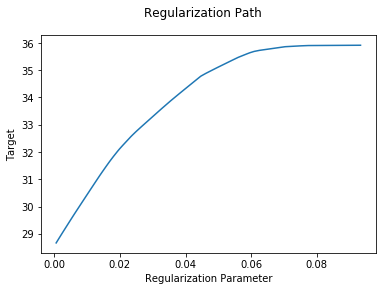

In [2]:
from pyprimal import QuantileRegression

n = 100 # sample number
d = 20 # sample dimension
c = 0.5 # correlation parameter
s = 5  # support size of coefficient

X = scale(np.random.randn(n,d)+c* np.tile(np.random.randn(n),[d,1]).T )/ (n*(n-1))**0.5
theta = np.append(np.random.rand(s), np.zeros(d-s))

## Generate response using Gaussian noise, and fit sparse linear models
noise = np.random.randn(n)
y = np.matmul(X,theta) + noise

tau = 0.4
solver = QuantileRegression(X, y, tau)
solver.train()
result = solver.coef()
solver.plot()

### Sparse SVM
$$\min_{\theta_0,\theta}\sum_{i=1}^{n}[1-y_i(\theta_0+\theta^Tx_i)]+ \quad s.t. \left\|\theta\right\|_1\le\lambda$$

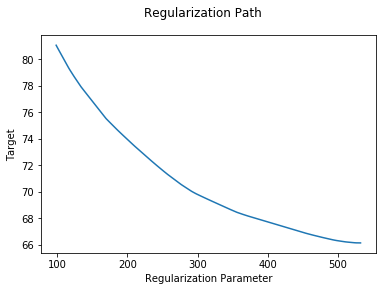

In [3]:
from pyprimal import SparseSVM

n = 100 # sample number
d = 20 # sample dimension
c = 0.5 # correlation parameter
s = 5  # support size of coefficient

X = scale(np.random.randn(n,d)+c* np.tile(np.random.randn(n),[d,1]).T )/ (n*(n-1))**0.5
theta = np.append(np.random.rand(s), np.zeros(d-s))

## Generate response using Gaussian noise, and fit sparse linear models
noise = np.random.randn(n)
y = np.sign(np.matmul(X,theta) + noise)

solver = SparseSVM(X, y)
solver.train()
result = solver.coef()
solver.plot()

### Dantzig Selector
$$\min_{\theta}\left\|\theta\right\|_1\quad s.t.\left\|X^T(y-X\theta)\right\|_\infty\le\lambda$$

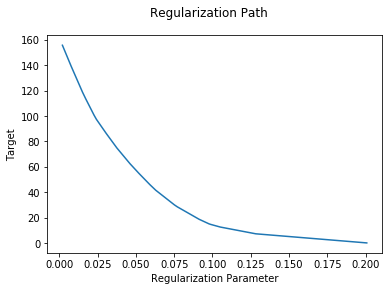

In [4]:
from pyprimal import Dantzig

n = 100 # sample number
d = 20 # sample dimension
c = 0.5 # correlation parameter
s = 5  # support size of coefficient

X = scale(np.random.randn(n,d)+c* np.tile(np.random.randn(n),[d,1]).T )/ (n*(n-1))**0.5
theta = np.append(np.random.rand(s), np.zeros(d-s))

## Generate response using Gaussian noise, and fit sparse linear models
noise = np.random.randn(n)
y = np.matmul(X,theta) + noise

solver = Dantzig(X, y)
solver.train()
result = solver.coef()
solver.plot()

### Compressed Sensing
$$\min_{\theta}\left\|\theta\right\|_1\quad s.t.\left\|y-X\theta\right\|_\infty\le\lambda$$

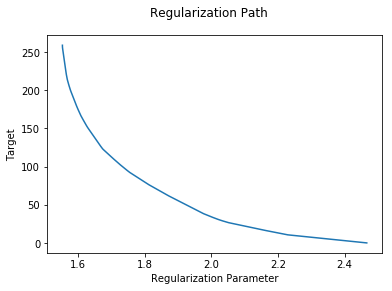

In [5]:
from pyprimal import CompressedSensing

n = 100 # sample number
d = 20 # sample dimension
c = 0.5 # correlation parameter
s = 5  # support size of coefficient

X = scale(np.random.randn(n,d)+c* np.tile(np.random.randn(n),[d,1]).T )/ (n*(n-1))**0.5
theta = np.append(np.random.rand(s), np.zeros(d-s))

## Generate response using Gaussian noise, and fit sparse linear models
noise = np.random.randn(n)
y = np.matmul(X,theta) + noise

solver = CompressedSensing(X, y)
solver.train()
result = solver.coef()
solver.plot()